<a href="https://colab.research.google.com/github/AnandNair9/neural-network/blob/dev-Anand/Anand_Nair_Neural_Network_pytorch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![AnalyticsDojo](https://github.com/rpi-techfundamentals/fall2018-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Pytorch with the MNIST Dataset - MINST</h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rpi-techfundamentals/fall2018-materials/blob/master/10-deep-learning/04-pytorch-mnist.ipynb)



From Kaggle: 
"MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike."

[Read more.](https://www.kaggle.com/c/digit-recognizer)


<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>

This code is adopted from the pytorch examples repository. 
It is licensed under BSD 3-Clause "New" or "Revised" License.
Source: https://github.com/pytorch/examples/
LICENSE: https://github.com/pytorch/examples/blob/master/LICENSE

![](https://github.com/rpi-techfundamentals/fall2018-materials/blob/master/10-deep-learning/mnist-comparison.png?raw=1)
Table from [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Pytorch Advantages vs Tensorflow
- Pytorch Enables dynamic computational graphs (which change be changed) while Tensorflow is static. 
- Tensorflow enables easier deployment. 

In [ ]:
#Import Libraries


from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable



In [ ]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset. 
args['lr']=0.01 #Learning rate is how fast it will decend. 
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=False


In [ ]:
#load the data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [ ]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
im = PIL.Image.open('/content/drive/MyDrive/histopathological dataset/NE/Follicular/81.JPG')

In [ ]:
import glob
import os

files_to_crop = glob.glob('/content/drive/MyDrive/histopathological dataset/*/*/*.JPG')
print("there are {AMT} files".format(AMT=len(files_to_crop)))
for f in files_to_crop:
  print(f)
  im = PIL.Image.open(f)
  #out_dir = "/".join(f.split('/')[0:-1]).replace('drive/MyDrive/histopathological dataset','cropped')

  out_dir = f.replace('histopathological dataset','cropped')
  out_dir = out_dir.split('/')
  out_dir = out_dir[0:-1]
  out_dir = "/".join(out_dir)
  
  file_name = f.split('/')[-1]

  if not os.path.exists(out_dir):
    os.makedirs(out_dir)
  
  im.crop((0,0,64,64)).save(os.path.join(out_dir, file_name))


there are 2129 files
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-16.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-13.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-12.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-23.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-08.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-11.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-14.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-17.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-24.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-10.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-05.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-18.JPG
/content/drive/MyDrive/histopathological dataset/EH/Complex/0125-21.JPG
/content/drive/MyDrive/histopathological da

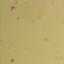

In [ ]:
im.crop((0,0,64,64))

In [ ]:
#!wget https://figshare.com/ndownloader/files/13496366 
#!unzip 13496366
!mv histopathological\ image\ dataset\ for\ ET/NE/Follicular histopathological\ image\ dataset\ for\ ET/NE_Follicular 
!mv histopathological\ image\ dataset\ for\ ET/NE/Luteal histopathological\ image\ dataset\ for\ ET/NE_Luteal
!mv histopathological\ image\ dataset\ for\ ET/NE/Menstrual histopathological\ image\ dataset\ for\ ET/NE_Menstrual
!mv histopathological\ image\ dataset\ for\ ET/EH/Simple histopathological\ image\ dataset\ for\ ET/EH_Simple
!mv histopathological\ image\ dataset\ for\ ET/EH/Complex histopathological\ image\ dataset\ for\ ET/EH_Complex
!rmdir  histopathological\ image\ dataset\ for\ ET/NE
!rmdir  histopathological\ image\ dataset\ for\ ET/EH

mv: cannot stat 'histopathological image dataset for ET/NE/Follicular': No such file or directory
mv: cannot stat 'histopathological image dataset for ET/NE/Luteal': No such file or directory
mv: cannot stat 'histopathological image dataset for ET/NE/Menstrual': No such file or directory
mv: cannot stat 'histopathological image dataset for ET/EH/Simple': No such file or directory
mv: cannot stat 'histopathological image dataset for ET/EH/Complex': No such file or directory
rmdir: failed to remove 'histopathological image dataset for ET/NE': No such file or directory
rmdir: failed to remove 'histopathological image dataset for ET/EH': No such file or directory


In [ ]:
!mkdir -p content/drive/MyDrive/cropped/NE_Follicular
!mkdir -p content/drive/MyDrive/cropped/NE_Luteal
!mkdir -p content/drive/MyDrive/cropped/NE_Menstrual
!mkdir -p content/drive/MyDrive/cropped/EH_Simple
!mkdir -p content/drive/MyDrive/cropped/EH_Complex
!mkdir -p content/drive/MyDrive/cropped/ET/NE
!mkdir -p content/drive/MyDrive/cropped/ET/EH

In [ ]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/hukim1112/DLCV_CLASS.git
  os.chdir('/content/DLCV_CLASS/lecture3')      
except Exception:
  pass

Cloning into 'DLCV_CLASS'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (15/15), done.
remote: Total 308 (delta 14), reused 14 (delta 14), pack-reused 293
Receiving objects: 100% (308/308), 36.64 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (105/105), done.


In [ ]:
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=100
args['lr']=0.01
args['momentum']=0.85

args['seed']=1
args['log_interval']=10
args['cuda']=True


In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.LazyConv2d(10, kernel_size=3, padding = 2)
        self.conv2 = nn.LazyConv2d(20, kernel_size=3, padding = 2)

        self.conv3 = nn.LazyConv2d(50, kernel_size=3, padding=2)
        self.conv4 = nn.LazyConv2d(50, kernel_size=3, padding=2)

        self.conv2_drop = nn.Dropout2d()  #Dropout
        self.fc1 = nn.LazyLinear(320, 160)
        self.fc1 = nn.LazyLinear(120)
        self.fc2 = nn.LazyLinear(7)
        
    def conv2d(x, output_dim, k_size=5, stride=2, stddev=0.02, name="conv2d"):
            conv = tf.keras.layers.Conv2D(output_dim, kernel_size=k_size, 
                                          strides=[stride, stride], padding="SAME", 
                                          kernel_initializer=init(stddev=0.02), name=name)(x)
            conv_output = tf.compat.v1.layers.Conv2D(output_dim, kernel_size=k_size, 
                                      strides=[stride, stride], padding='SAME', 
                                      kernel_initializer=init(stddev=0.02), name=name)(x)

    def forward(self, x):
        #Convolution Layer/Pooling Layer/Activation
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        x = F.max_pool2d(x, 2)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        return F.log_softmax(x, dim=1)


In [ ]:
#@title Default title text

def train(epoch):
    print(epoch)
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable. 
        data, target = Variable(data), Variable(target)
        #This will zero out the gradients for this batch. 
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = F.cross_entropy(output, target)
        #dloss/dx for every Variable 
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically. 
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test(epoch):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
             
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    return 100. * correct / len(test_loader.dataset)




In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchvision.transforms.transforms import Grayscale
dataset = datasets.ImageFolder('/content/drive/MyDrive/cropped',
transform=transforms.Compose([transforms.ToTensor(),transforms.Grayscale(),transforms.Resize([64,64])]))

In [ ]:
dataset_train = torch.utils.data.Subset(dataset,[x for x in range(len(dataset)) if x%10 != 0])
dataset_test = torch.utils.data.Subset(dataset,[x for x in range(len(dataset)) if x%10 == 0])

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset_train,batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset_test,batch_size=64,shuffle=False)

In [ ]:
import matplotlib.pyplot as plt
for data, target in train_loader:
  print(target)
  break
  plt.imshow(im[10:100,:,0])


tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections

def add_collection(collection, autolim=True):
  t = np.arange(0.0, 2, 0.01)
  s1 = np.sin(2*np.pi*t)
  s2 = 1.2*np.sin(4*np.pi*t)

  fig, ax = plt.subplots()
  ax.set_title('Machine testing')
  ax.plot(t, s1, color='black')
  ax.axhline(0, color='black', lw=2)

  collection = collections.BrokenBarHCollection.span_where(
      t, ymin=0, ymax=1, where=s1 > 0, facecolor='green', alpha=0.5)
  ax.add_collection('/content/drive/MyDrive/cropped')

  collection = collections.BrokenBarHCollection.span_where(
      t, ymin=-1, ymax=0, where=s1 < 0, facecolor='red', alpha=0.5)
  ax.add_collection('/content/drive/MyDrive/cropped')


  plt.show()

In [ ]:
#import glob
#for file_name in glob.glob("histopathological image dataset for ET/*/*"):
  #try:
    #im=PIL.Image.open(file_name)
  #except:
    #pass
  #im=im[10:100,50:80]
  #im.imwrite("cropped/NE_Follicular/"+file_name.split("/")[-1])
  #crop=im.crop((0,0,64,64))
  #crop.im.crop((0,0,64,64))
  #crop.save("cropped/"+file_name.split("/")[-1])
  
  #crop.save("cropped/NE_Follicular/"/+file_name.split("/")[-1])
  #crop.save("cropped/NE_Luteal/"/+file_name.split("/")[-1])
  #crop.save("cropped/NE_Menstrual/"/+file_name.split("/")[-1])
  #crop.save("cropped/EH_Simple/"/+file_name.split("/")[-1])
  #crop.save("cropped/EH_Complex/"/+file_name.split("/")[-1])
  #crop.save("cropped/ET/NE/"/+file_name.split("/")[-1])
  #crop.save("cropped/ET/EH/"/+file_name.split("/")[-1])
              

In [ ]:
#crop.im.crop((0,0,64,64))
    #crop.save("cropped/"+file_name.split("/")[-1])

In [ ]:
#optim.Adam(model.parameters())
#optim.Adagrad(model.parameters())
#optim.Adelta(model.parameters())


In [ ]:
accuracy_over_time=[]

model = Net()
if args['cuda']:
    model.cuda()

optim.Adam(model.parameters())

optimizer = optim.SGD(model.parameters(), lr=0.01)#, momentum=args

for epoch in range(1, 50 + 1):
    train(epoch)
    
    acc=test(epoch)
    accuracy_over_time.append(acc)


1


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


IndexError: ignored

In [ ]:
model = Net()
if args['cuda']:
    model.cuda()

In [ ]:
[i for i in model.parameters()]